In [ ]:
# Import the necessary packages
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 12
CHANNELS = 3 #Three RGB channels
epochs = 5

In [ ]:
#tensorflow dataset(Tensorflow input pipeline)
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Training- Image Dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 498 files belonging to 2 classes.


In [ ]:
#We have 2 classes which will further be labelled as 0 and 1
class_names = dataset.class_names
class_names

['hot_dog', 'not_hot_dog']

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(12, 256, 256, 3)
[1 0 1 0 1 1 0 1 0 0 0 0]


In [ ]:
#Again lets see shape of first image
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


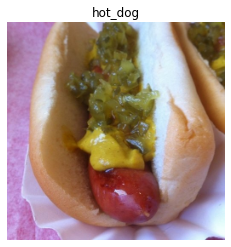

In [ ]:
#Visualizing the first image
#It is shuffling so everytime we see different image
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    #labelling the image with class name
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

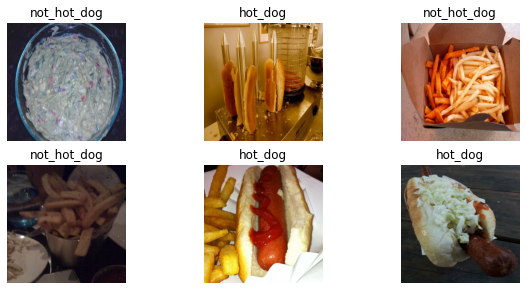

In [ ]:
#Now if I want to display first 6 images
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(4,3,i+1) #ax=axes help to plot 1 or more imgs in same window
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
# Create ImageDataGenerator objects
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [ ]:
# Assign the image directories to them
train_data_generator = train_datagen.flow_from_directory(
    "Training- Image Dataset",
    target_size=(512,512)
)

Found 498 images belonging to 2 classes.


In [ ]:
test_data_generator = train_datagen.flow_from_directory(
    "Testing- Image Dataset",
    target_size=(512,512)
)

Found 500 images belonging to 2 classes.


In [ ]:
# Build the Transfer Learning Model with TensorFlow

In [ ]:
resnet_50 = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet')
resnet_50.trainable=False

94765736/94765736 [==============================] - 90s 1us/step


In [ ]:
#We have binary classification since ResNet50 has more than 2 nodes in final layers. 
#We will add final layer manually
#The use of Functional API is done
#We can also use a sequential API if we want
inputs = keras.Input(shape=(512,512,3))
x = resnet_50(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(2, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="my_model")
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
history = model.fit(train_data_generator, validation_data=test_data_generator, epochs=5)

Epoch 1/5
16/16 [==============================] - 320s 21s/step - loss: 0.3125 - accuracy: 0.9096 - val_loss: 0.3412 - val_accuracy: 0.8820
Epoch 2/5
16/16 [==============================] - 317s 21s/step - loss: 0.2915 - accuracy: 0.9096 - val_loss: 0.3277 - val_accuracy: 0.8800
Epoch 3/5
16/16 [==============================] - 331s 21s/step - loss: 0.2770 - accuracy: 0.9197 - val_loss: 0.3182 - val_accuracy: 0.8780
Epoch 4/5
16/16 [==============================] - 335s 22s/step - loss: 0.2576 - accuracy: 0.9317 - val_loss: 0.3232 - val_accuracy: 0.8780
Epoch 5/5
16/16 [==============================] - 343s 22s/step - loss: 0.2430 - accuracy: 0.9398 - val_loss: 0.3090 - val_accuracy: 0.8840


In [ ]:
scores = model.evaluate(test_data_generator)

16/16 [==============================] - 160s 10s/step - loss: 0.3090 - accuracy: 0.8840


In [ ]:
scores

[0.3090323209762573, 0.8840000033378601]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

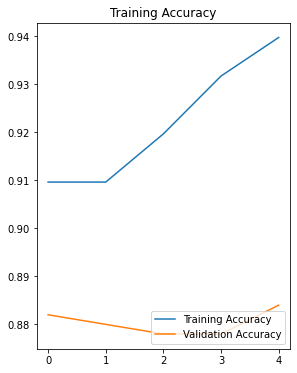

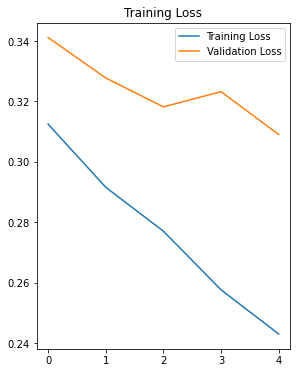

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()